In [1]:
import pandas as pd
import numpy as np
from mplsoccer import Pitch
import json
import matplotlib.pyplot as plt
from highlight_text import HighlightText
import random

pitch_length_x = 120
pitch_width_y = 80

pd.set_option('display.max_columns', None)

home_team = "Argentina"
away_team = "France"
home_color = "#ADD8E6"
away_color = "#00008B"

/Users/rolandkovacs/Documents/repos/friends_of_tracking/friends_of_tracking/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
with open(f"../data/3869685.json") as f:
    events = json.load(f)

df = pd.json_normalize(events, sep='_').assign(match_id=3869685)

In [4]:
def create_pass_plot(df, team, color, subtitle):
    passes = df.loc[df.type_name=='Pass'].set_index('id')
    passes = passes[passes.team_name == team]

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#444444', line_color='#c7d5cc')
    fig, axs = pitch.grid(figheight=7, title_height=0.08, endnote_space=0, axis=False, 
                        title_space=0, grid_height=0.82, endnote_height=0.05)

    fig.set_facecolor("#444444")

    locations = passes.location.values
    circleSize = 2
    for loc in locations:
        x = loc[0]
        y = loc[1]
        passCircle=plt.Circle((x,pitch_width_y-y), circleSize, color=color)     
        passCircle.set_alpha(.2)
        axs['pitch'].add_patch(passCircle)

    axs['endnote'].text(0.5, 0.9, 'Attacking Direction', va='center', ha='center', color='lightgrey', fontsize=12)
    axs['endnote'].arrow(0.4, 0.6, 0.2, 0, head_width=0.25, head_length=0.025, ec='lightgrey', fc='lightgrey')
    axs['endnote'].set_xlim(0, 1)
    axs['endnote'].set_ylim(0, 1)

    highlight_textprops =\
        [{"color": home_color, "fontsize":18, "fontweight":'bold'},
        {"color": "w", "fontsize":18,  "fontweight":'bold'},
        {"color": away_color, "fontsize":18,  "fontweight":'bold'}]

    HighlightText(x=0.5, y=0.7, va='center', ha='center',
                s=f"<{home_team}> <vs> <{away_team}>",
                highlight_textprops=highlight_textprops,
                ax=axs['title'])

    axs['title'].text(0.5, 0.2, subtitle, color='w',
                    va='center', ha='center', fontsize=15) 

    plt.show()

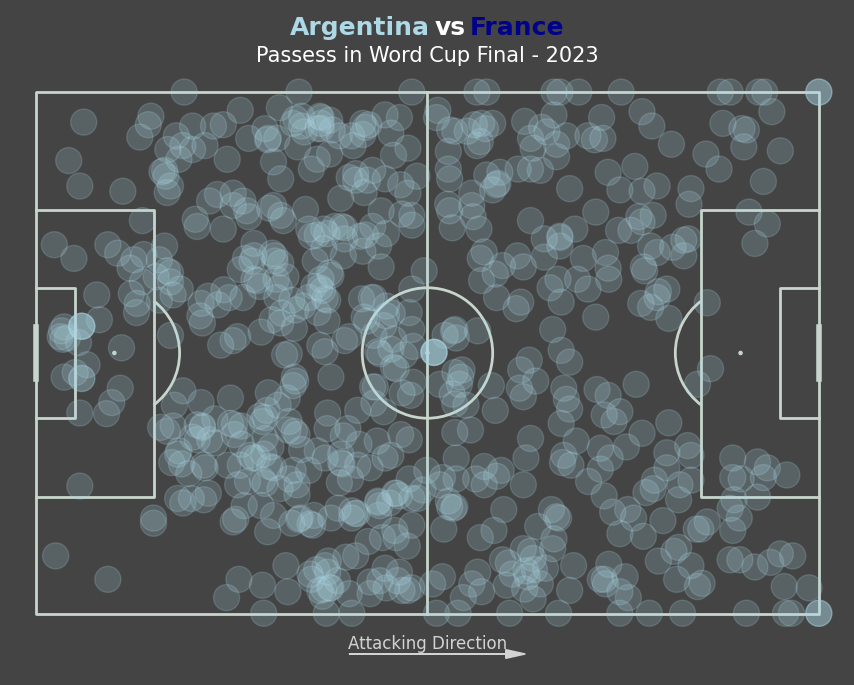

In [5]:
home_team = "Argentina"
away_team = "France"
home_color = "#ADD8E6"
away_color = "#00008B"
subtitle = "Passess in Word Cup Final - 2023"

create_pass_plot(df, home_team, home_color, subtitle)

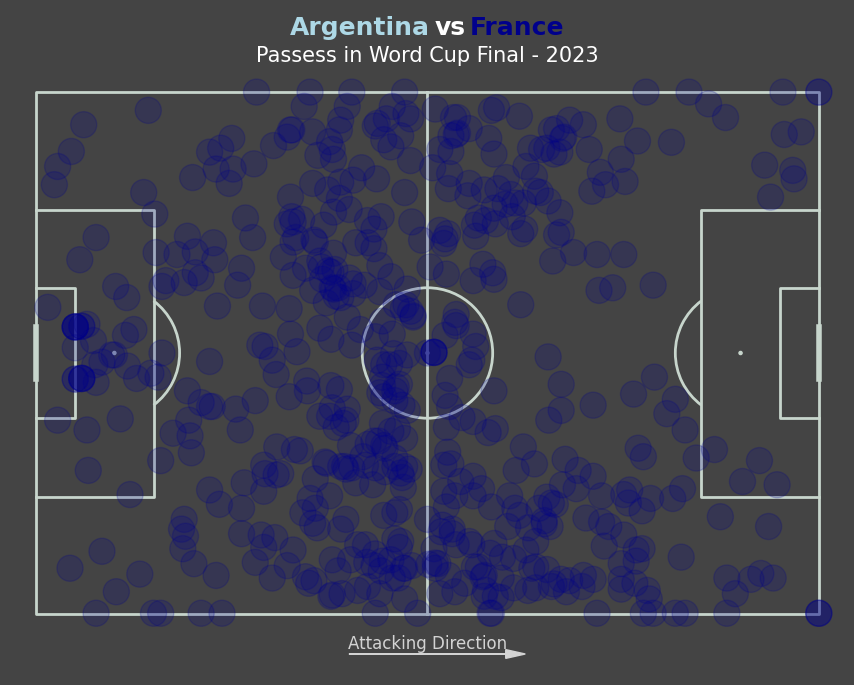

In [6]:
create_pass_plot(df, away_team, away_color, subtitle)